In [ ]:
# In this code we are going to use logistic regression,Support Vector Machine,Random Forest to predict cancer diagnosis
# For running the code we need to python 3.10.11
# !/usr/bin/env python3
# we need these libraries
# we to dataset (cancer.csv)
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data
df = pd.read_csv('cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: xlabel='diagnosis', ylabel='count'>

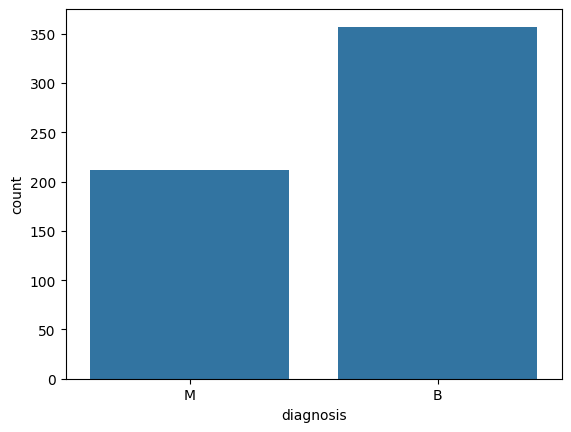

In [4]:
# Visualize the diagnosis column
sns.countplot(x='diagnosis',data=df)

In [5]:
# data= df.drop(['Unnamed: 32' , 'id'], axis=1)
# df.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]
# y = df.diagnosis

In [6]:
# Convert diagnosis column to binary values 
# Becomung m to 0 and b to 1
df.diagnosis = [1 if each == 'M' else 0 for each in df.diagnosis]


In [ ]:
# Convert categorical values to numerical values
# Becomung m to 0 and b to 1
# for k in df.diagnosis:
      # if k == 'M':
         # df['diagnosis'] = df['diagnosis'].replace('M', 0)

          # df['diagnosis'] = df['diagnosis'].replace('B', 1)  


C:\Users\HP\AppData\Local\Temp\ipykernel_13600\2353131797.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace('B', 1)


In [7]:
# Specify (x,y)
# Delate x by droping
x0 = df.drop(["diagnosis", "Unnamed: 32", "id"], axis=1)
# Specify y
y = df.diagnosis

In [8]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [9]:

 # d = np.array([0,10,20,200,40,50,100])

 # d2 = (d - np.min(d)) / (np.max(d) - np.min(d))

 # print(d2)

In [10]:
# for normalization
x = (x0 - np.min(x0)) / (np.max(x0) - np.min(x0))
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.004229      0.002440        0.028867   0.235308         0.000028   
1       0.004835      0.004177        0.031241   0.311707         0.000020   
2       0.004629      0.004995        0.030559   0.282793         0.000026   
3       0.002685      0.004791        0.018237   0.090762         0.000033   
4       0.004770      0.003371        0.031758   0.304890         0.000024   
..           ...           ...             ...        ...              ...   
564     0.005068      0.005263        0.033380   0.347673         0.000026   
565     0.004732      0.006641        0.030842   0.296427         0.000023   
566     0.003902      0.006601        0.025458   0.201716         0.000020   
567     0.004843      0.006895        0.032934   0.297367         0.000028   
568     0.001824      0.005769        0.011265   0.042548         0.000012   

     compactness_mean  concavity_mean  concave points_mean  sym

In [11]:
# For splite x and y as train becuase we should trained some of (x) not all
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
# Print the shapes of the train and test sets

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (483, 30)
x test:  (86, 30)
y train:  (483,)
y test:  (86,)


In [13]:
print("y train: ", y_train.shape)

y train:  (483,)


In [ ]:
# Standardize the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [25]:
# Now we are going to create model
model = linear_model.LogisticRegression()
# And also we should increase max_iter becuase sometimes the default value is low
model.max_iter = 10000000
# Now we are going to predict
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000000
,multi_class,'deprecated'


In [26]:
# Now we are going to predict
out = model.predict(X_test_scaled)

In [27]:
# And now we are going to calculate error
error = out - y_test
print(error)

204    0
70     0
131    0
431    0
540    0
      ..
333    0
86     0
250    0
274    0
257    0
Name: diagnosis, Length: 86, dtype: int64


In [28]:
# Now we are going to calculate true and false
true = 0
false = 0

for a in error:

   if (a==0):
      true=true+1
   if (a!=0):
      false=false+1   

print(true)
print(false)

84
2


In [29]:
# Now we are going to calculate accuracy
# accuracy = (true / (true + false)) * 100
t = model.predict(X_test_scaled)
v = y_test == t
v = v.reset_index()
v = v.diagnosis

n = 0
for i in v:
   if i == False : n=n+1
print(100-(n * 100)/len(v))   

97.67441860465117


In [ ]:
# Now we are going to use Random Forest Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [ ]:
# Now we are going to use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(x_train, y_train)  # RF scaling نمی‌خواد

y_pred_rf = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
from sklearn.metrics import accuracy_score, classification_report

Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.97      0.91      0.94        32

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86



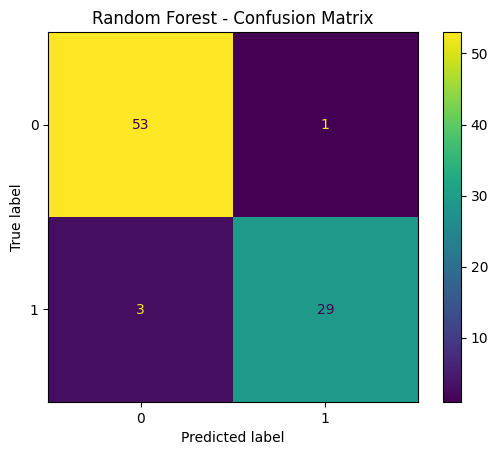

In [ ]:
# Confusion Matrix for Random Forest
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest - Confusion Matrix")
plt.show()


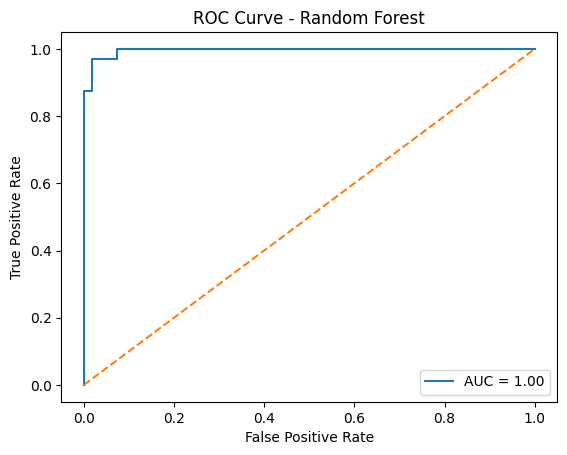

In [ ]:
# ROC Curve for Random Forest
from sklearn.metrics import roc_curve, auc
y_prob_rf = rf.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()
